# <center>Digital Image Processing - Problem Set 6</center>

### Student Names:
Jorge Ortega, Sebastian Salas, Katerine Vera

In [235]:
import cv2
import cv2
import numpy as np
from matplotlib import pyplot as plt
from os import listdir, path
import os
import json
from sklearn import svm
from sklearn.model_selection import cross_val_score

%matplotlib inline

pth_train = 'Training_set/'
pth_test = 'Testing_set/'

### Problem 1

Write a function that performs image recognition using $k$-Nearest Neighbors ($k$-NN). You can (and are encouraged to) use the functions you have written for previous exercises. Your function should run the following steps:

#### 1. Create dataset

For this semester we are going to make use of pokemon images found on internet.
- Pick 1 pokemon for each of the following pokemon types = [--fire--, --water--, --electric--, --grass--, --ghost--]. The complete list is found in the *pokemon.csv* file. **Only first generation pokemons are accepted**
- Create two folders: **training_set** and **testing_set**
- For each selected pokemon, pick at least 10 different images and store 7 in training folder. The rest must be stored in the testing one.
- Resize all images to a 200x200 resolution. Delete the previously saved images in order to preserve space. 
- If any image pre-processing is necessary, please do.

Repeat all steps for all pokemon images.

**Example images.**
<p>Fire</p>
<img style="float: left; margin: 0px 0px 15px 15px;" src="example/Charizard/Charizard1.png" width="200" height="200">
<img style="float: left; margin: 0px 0px 15px 15px;" src="example/Charizard/Charizard2.png" width="200" height="200">
<img style="margin: 0px 0px 15px 15px;" src="example/Charizard/Charizard3.png" width="200" height="200">

<br>

<br>

<p>Water</p>

<br>
<img style="float: left; margin: 0px 0px 15px 15px;" src="example/blast_1.jpg" width="150" height="150">
<img style="margin:0px 0px 15px 15px;" src="example/blast_2.png" width="150" height="150"><br>


#### 2. Compute descriptors

- Describe each pokemon in the training set.
- You are encouraged to select the most appropiate descriptor seen in class.
- Explain the reasons why you picked it. The result must be in one feature vector per image.
- Repeat previous steps for all images within the training set.

#### 3. Create classifier

The $k$-NN classifier predicts a category for each testing example according to the following steps:
- Pick an image from the testing set.
- Compute the distance from the feature vector associated to the testing example to all the descriptors from the training set.
- Select the closest $k$ training examples (that is, the $k$ training examples with shortest distance to our testing image).
- Find the category(pokemon) associated to each of the $k$ training examples. This information is created by you in the training set.
- Assign a label to the testing image. The assigned label is equal to the most common label among the $k$ closes training examples.

#### 4. Perform experiments

Repeat this process for all testing examples. Compute the accuracy of the classifier in terms of the number of correctly classified testing examples over the total number of examples in the testing set. Compare the difference in performance between a 1-NN classifier, a 3-NN classifier and a $k$-NN classifier. Summarize the performance of each classifier using confusion matrices.

**csv file source:** https://www.kaggle.com/abcsds/pokemon

(200, 200)


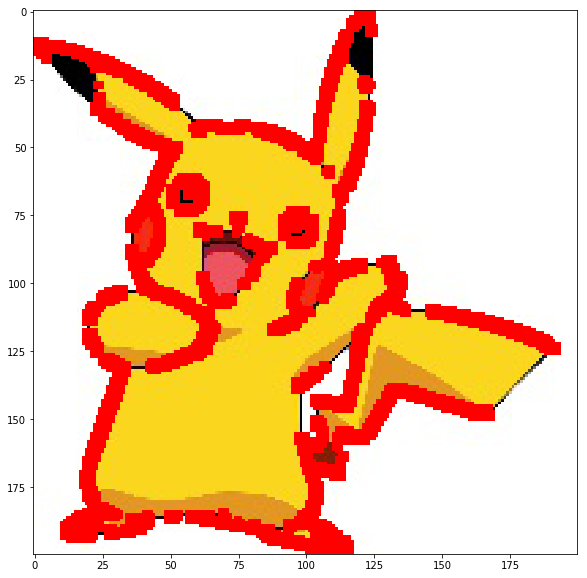

In [90]:
img = cv2.imread("images/Pikachu/200x200Pikachu1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.imread("images/Pikachu/200x200Pikachu1.jpg",cv2.IMREAD_GRAYSCALE)

#plt.figure(figsize=(10,10))
#plt.imshow(img, cmap="gray")
#plt.axis("off")
#plt.show()

gray = np.float32(gray)
dst = cv2.cornerHarris(gray, 3, 1, 0.04)

print(dst.shape)
dst = cv2.dilate(dst,None)

img[dst>0.01*dst.max()]=[255,0,0]

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [ ]:

pokemons = list(os.walk(pth_train))[0][1]
pokemon_descriptors = {k: [] for k in pokemons}

print(pokemon_descriptors.keys())
for pokemon in pokemons:
    full_pth = pth_train + pokemon + '/'
    for image in os.listdir(full_pth):
        img = cv2.imread(full_pth + image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        gray = cv2.imread(full_pth + image, cv2.IMREAD_GRAYSCALE)
        
        sift = cv2.xfeatures2d.SIFT_create()
        kp = sift.detect(gray,None)

        temp = [kp[idx].pt for idx in range(len(kp))]
        
        temp = list(zip(*temp))

        temp = list(temp[0]) + list(temp[1])
        pokemon_descriptors[pokemon].append(temp)

        
maxy = 35
lens = [len(i) for i in pokemon_descriptors[k] for k in pokemon_descriptors.keys() ]
maxx = max(lens)
X = np.zeros((maxy, maxx))
print(X.shape)
y = list()
count = 0
for k in pokemon_descriptors.keys():
    for l in pokemon_descriptors[k]:
        l = l + [0] * (maxx - len(l))
        X[count] = np.array(l)
        y.append(k)
        count +=1
            
print(X.shape)
print(X[0].dtype)
        
classifier = svm.SVC()
classifier.fit(X, y)

score = cross_val_score(classifier, X, y, cv=3)
print(score.mean(), score.std()*2)

pokemons = list(os.walk(pth_test))[0][1]

for pokemon in pokemons:
    full_pth = pth_test + pokemon + '/'
    for image in os.listdir(full_pth):
        gray = cv2.imread(full_pth + image, cv2.IMREAD_GRAYSCALE)

        sift = cv2.xfeatures2d.SIFT_create()
        kp = sift.detect(gray,None)

        temp = [kp[idx].pt for idx in range(len(kp))]

        temp = list(zip(*temp))
        l = list(temp[0]) + list(temp[1])
        
        if len(l) > maxx:
            continue

        l = l + [0] * (maxx - len(l))

        print(image[7:-3], classifier.predict([l]), classifier.decision_function(np.array([l])))





In [242]:
pokemons = list(os.walk(pth_train))[0][1]
pokemon_descriptors = {k: [] for k in pokemons}

for pokemon in pokemons:
    full_pth = pth_train + pokemon + '/'
    for image in os.listdir(full_pth):
        img = cv2.imread(full_pth + image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        r_ch = img[:, :, 0]
        g_ch = img[:, :, 1]
        b_ch = img[:, :, 2]
        
        r_r, _ = np.histogram(r_ch, bins=range(0, 255))
        g_r, _ = np.histogram(g_ch, bins=range(0, 255))
        b_r, _ = np.histogram(b_ch, bins=range(0, 255))
        temp = b_r
        pokemon_descriptors[pokemon].append(temp)

        
maxy = 35
lens = [len(i) for i in pokemon_descriptors[k] for k in pokemon_descriptors.keys() ]
maxx = max(lens)
X = np.zeros((maxy, maxx))
y = list()
count = 0
for k in pokemon_descriptors.keys():
    for l in pokemon_descriptors[k]:
        X[count] = np.array(l)
        y.append(k)
        count +=1
            
print(X.shape)
        
classifier = svm.SVC()
classifier.fit(X, y)

score = cross_val_score(classifier, X, y, cv=3)
print(score.mean(), score.std()*2)

pokemons = list(os.walk(pth_test))[0][1]

for pokemon in pokemons:
    full_pth = pth_train + pokemon + '/'
    for image in os.listdir(full_pth):
        img = cv2.imread(full_pth + image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        r_ch = img[:, :, 0]
        g_ch = img[:, :, 1]
        b_ch = img[:, :, 2]
        
        r_r, _ = np.histogram(r_ch, bins=range(0, 255))
        g_r, _ = np.histogram(g_ch, bins=range(0, 255))
        b_r, _ = np.histogram(b_ch, bins=range(0, 255))
        l = b_r
        print(image[7:-3], classifier.predict([l]), classifier.decision_function(np.array([l])))





(35, 254)
0.255555555556 0.0831479419283
oddish3. ['oddish'] [[ 2.875  1.875  0.875  4.5   -0.125]]
oddish4. ['oddish'] [[ 2.875  1.875  0.875  4.5   -0.125]]
oddish6. ['oddish'] [[ 2.875  1.875  0.875  4.5   -0.125]]
oddish2. ['oddish'] [[ 2.875  1.875  0.875  4.5   -0.125]]
oddish5. ['oddish'] [[ 2.875  1.875  0.875  4.5   -0.125]]
oddish7. ['oddish'] [[ 2.875  1.875  0.875  4.5   -0.125]]
oddish1. ['oddish'] [[ 2.875  1.875  0.875  4.5   -0.125]]
poliwrath1. ['poliwrath'] [[ 2.890625  1.890625  0.890625 -0.171875  4.5     ]]
poliwrath2. ['poliwrath'] [[ 2.890625  1.890625  0.890625 -0.171875  4.5     ]]
poliwrath7. ['poliwrath'] [[ 2.890625  1.890625  0.890625 -0.171875  4.5     ]]
poliwrath6. ['poliwrath'] [[ 2.890625  1.890625  0.890625 -0.171875  4.5     ]]
poliwrath3. ['poliwrath'] [[ 2.890625  1.890625  0.890625 -0.171875  4.5     ]]
poliwrath5. ['poliwrath'] [[ 2.890625  1.890625  0.890625 -0.171875  4.5     ]]
poliwrath4. ['poliwrath'] [[ 2.890625  1.890625  0.890625 -0.17187